In [366]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import textacy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

# Splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import accuracy_score

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [ ]:
## Import Data

In [567]:
import ast
# ast.literal_eval
# df = get_undersampled(pd.read_csv("data/train_raw.csv"))
# df2 = get_undersampled(pd.read_csv("data/test_raw.csv"))

df = pd.read_csv("data/train_raw.csv")
df2 = pd.read_csv("data/test_raw.csv")

In [ ]:
df

In [568]:
train_tags =df["tags"]
test_tags = df2["tags"]

In [569]:
train_labels = df
# labels.head()
test_labels = df2

In [571]:
len(test_tags.tolist())

617

In [114]:
ast.literal_eval(tags[2])

['MacArthur grant',
 'activism',
 'business',
 'cities',
 'environment',
 'green',
 'inequality',
 'politics',
 'pollution']

In [572]:
docs = []
train_corp = textacy.Corpus(lang='en')
for l in train_tags.tolist():
    train_corp.add_text(' '.join(ast.literal_eval(l)))
test_corp = textacy.Corpus(lang='en')
for l in test_tags.tolist():
    test_corp.add_text(' '.join(ast.literal_eval(l)))

In [132]:
## Entire corpus
TR_LEN = len(train_corp)
TE_LEN =len(test_corp)      

In [575]:
# entire_corpus = textacy.Corpus(lang='en')
# for l in train_tags.tolist()+test_tags.tolist():
#     entire_corpus.add_text(' '.join(ast.literal_eval(l)))

In [129]:
len(entire_corpus)

1207

In [116]:
test_corp

Corpus(590 docs; 5196 tokens)

## Preprocess Data - Without combining

In [117]:
# def tf_idf_corpus(corpus):
#     vectorizer = textacy.Vectorizer(
#         tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
#         min_df=2, max_df=0.95)
#     doc_term_matrix = vectorizer.fit_transform(
#         (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
#          for doc in corpus))
#     return doc_term_matrix
# X = tf_idf_corpus(train_corp)
# X_test = tf_idf_corpus(test_corp)

## vectorize data with combining

In [573]:
def tf_idf_corpus(train_c,test_c):
    vectorizer = textacy.Vectorizer(
        tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
        min_df=2, max_df=0.95)
    train = vectorizer.fit_transform(
        (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
         for doc in train_c))
    test = vectorizer.transform(
        (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
         for doc in test_c))
    return train,test
X_train,X_test = tf_idf_corpus(train_corp,test_corp)
#  = tf_idf_corpus(test)
# X_train=X[:TR_LEN]
# X_test = X[TR_LEN:]

In [581]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1850, 472) (1850,) (617, 472) (617,)


In [578]:
def get_logreg_results(X_train, X_test, y_train, y_test):
    print("Training Logistic Regression")
    clf = LogisticRegression()
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_t)
        scores.append(f1_score(y_t, predictions, average="weighted"))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("Logistic cross-validation F1: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    print("Logistic F1 on the test set: {}".format(f1_score(y_test, clf.predict(X_test),average="weighted")))
    
def get_svm_results(X_train, X_test, y_train, y_test):
    print("Training SVM")

    clf = SVC(kernel='linear')
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_t)
        scores.append(f1_score(y_t, predictions, average="weighted"))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("SVM cross-validation f1: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    print("SVM F1 on the test set: {}".format(f1_score(y_test, clf.predict(X_test),average="weighted")))


In [580]:
y_train = train_labels["label"].as_matrix()
y_test = test_labels["label"].as_matrix()

In [120]:
type(X_train)

scipy.sparse.csr.csr_matrix

## Undersampled

In [122]:
# get_logreg_results(X_train, X_test, y_train, y_test)

In [123]:
# get_svm_results(X_train, X_test, y_train, y_test)

## Not Undersampled

In [582]:
get_logreg_results(X_train, X_test, y_train, y_test)

Training Logistic Regression
Fold 1: 0.4751060259318066
Fold 2: 0.48602054919290627
Fold 3: 0.451324947053127
Fold 4: 0.4676515270363124
Fold 5: 0.4629097148250837
Logistic cross-validation F1: 0.46860255280784724


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic F1 on the test set: 0.48355107887293675


In [583]:
get_svm_results(X_train, X_test, y_train, y_test)

Training SVM


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fold 1: 0.4672143367484917
Fold 2: 0.4535639774465551
Fold 3: 0.4619054624515376
Fold 4: 0.48608534685545735
Fold 5: 0.4788040905013588
SVM cross-validation f1: 0.4695146428006801
SVM F1 on the test set: 0.4777761617924067


In [85]:
 def get_undersampled(df, threshold=200, window=10):
        indices = df['label'].value_counts()[df['label'].value_counts() > threshold].index.tolist()

        for ind in indices:
            over_df = df[df['label'] == ind].reset_index(drop=True)
            df = df.drop(df[df['label'] == ind].index)
            to_drop = np.random.randint(threshold-window, 
                                        threshold+window)

            trans_ids = np.random.choice(range(len(over_df)),
                                         to_drop)

            dfs_to_add = over_df.iloc[trans_ids]
            df = pd.concat([df, dfs_to_add]).reset_index(drop=True)


        # Shuffle result
        df = df.sample(frac=1).reset_index(drop=True)

        return df

# CNN Text Classification, no undersamplng

In [160]:
import gensim
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import random

In [206]:
!cp train_5500.label train_5500.label.txt

In [312]:
flatten = lambda l: [item for sublist in l for item in sublist]
def flatten2(l):
    res = []
    for elem in l:
        for item in elem.split(' '):
#             a.append(item)
            res.append(item)
    return res
            

In [330]:
data = open('train_5500.label.txt', 'r', encoding='latin-1').readlines()

data = [[d.split(':')[1][:-1], d.split(':')[0]] for d in data]

X_2, y_2 = list(zip(*data))
vocab = list(set(flatten2(X_2)))#converts sentences into sequence of characters, and finds unique set of characters
X_2 = [i.split(' ') for i in X_2 ]
### Num masking 

In [333]:
# X_2

In [334]:
# X_2

In [213]:
# list(zip(X_2, y))

In [224]:
# list(set(flatten(X_2)))

In [142]:
a = {}
[a.update(entire_corpus[i].to_bag_of_terms(ngrams=1, as_strings=True))  for i in range(len(entire_corpus))]

In [143]:
a

{'entertainment': 1,
 'global': 1,
 'issue': 1,
 'live': 1,
 'music': 2,
 'performance': 1,
 'poetry': 1,
 'politic': 1,
 'war': 1,
 'art': 2,
 'book': 1,
 'chemistry': 1,
 'food': 1,
 'life': 1,
 'love': 1,
 'science': 1,
 'gender': 1,
 'equality': 1,
 'activism': 1,
 'feminism': 1,
 'government': 1,
 'history': 1,
 'inequality': 1,
 'motivation': 1,
 'personal': 1,
 'growth': 1,
 'social': 1,
 'change': 1,
 'society': 1,
 'woman': 1,
 'tedx': 1,
 'creativity': 1,
 'capitalism': 1,
 'economic': 1,
 'money': 1,
 'policy': 1,
 'resource': 1,
 'work': 1,
 'community': 1,
 'humanity': 1,
 'identity': 1,
 'race': 1,
 'violence': 1,
 'animal': 1,
 'nature': 1,
 'photography': 1,
 'film': 1,
 'design': 1,
 'humor': 1,
 'philosophy': 1,
 'storytelling': 1,
 'collaboration': 1,
 'crowdsourcing': 1,
 'datum': 1,
 'technology': 1,
 'visualization': 1,
 'comedy': 1,
 'brain': 1,
 'presentation': 1,
 'ai': 1,
 'drone': 1,
 'robot': 1,
 'happiness': 1,
 'psychology': 1,
 'relationship': 1,
 'storyt

# Create Vocab of features

In [335]:
word2index={'<PAD>': 0, '<UNK>': 1}
for key in a.keys():
    if key not in word2index:
        word2index[key] = len(word2index)
index2word = {v:k for k, v in word2index.items()}#loop through sets, and set the value as index, and key as value

word2index2={'<PAD>': 0, '<UNK>': 1}
for key in vocab:
    if key not in word2index2:
        word2index2[key] = len(word2index2)
index2word2 = {v:k for k, v in word2index2.items()}#loop through sets, and set the value as index, and key as value

# Create Label Vocab

In [336]:
target2index = {}

for cl in set(labels):
    if target2index.get(cl) is None:
        target2index[cl] = len(target2index)# assign an index to unique labels

index2target = {v:k for k, v in target2index.items()}


target2index2 = {}

for cl in set(y_2):
    if target2index2.get(cl) is None:
        target2index2[cl] = len(target2index2)# assign an index to unique labels

index2target2 = {v:k for k, v in target2index2.items()}

In [337]:
# word2index2

{'<PAD>': 0,
 '<UNK>': 1,
 'baseball': 2,
 'Buda': 3,
 'Wines': 4,
 'year': 5,
 'named': 6,
 'Faber': 7,
 'Milton': 8,
 'horsepower': 9,
 'Biscay': 10,
 'khaki': 11,
 'dingoes': 12,
 'positions': 13,
 'Wassermann': 14,
 'veins': 15,
 'mechanism': 16,
 'Holy': 17,
 'Lawrence': 18,
 'Danube': 19,
 'Yousuf': 20,
 'Craig': 21,
 'birth': 22,
 'A&W': 23,
 'Methodist': 24,
 'games': 25,
 'Dennis': 26,
 'coastal': 27,
 'Springs': 28,
 '!': 29,
 'Spider-Man': 30,
 'build': 31,
 'fastest': 32,
 'citizen': 33,
 'are': 34,
 'Zealand': 35,
 'Metropolis': 36,
 'Internet': 37,
 'abolished': 38,
 'ouzo': 39,
 'pressured': 40,
 'begins': 41,
 'baseemen': 42,
 'Pacific': 43,
 'softball': 44,
 'Philadelphia': 45,
 'Somalia': 46,
 'morning': 47,
 'Reflections': 48,
 'cop': 49,
 'operate': 50,
 'Nabokov': 51,
 'monkey': 52,
 'Khrushchev': 53,
 'Tristan': 54,
 'spend': 55,
 'terms': 56,
 'enhance': 57,
 'somene': 58,
 'Genome': 59,
 'rain': 60,
 'describing': 61,
 'control': 62,
 'Osbourne': 63,
 'fall': 64

In [407]:
X = []
X+=[list(train_corp[i].tokens) for i in range(len(train_corp))]

In [504]:
def getBatch(batch_size, train_data):
    random.shuffle(train_data)
    sindex = 0
    eindex = batch_size
    while eindex < len(train_data):
        batch = train_data[sindex: eindex]
        temp = eindex
        eindex = eindex + batch_size
        sindex = temp
        yield batch
    
    if eindex >= len(train_data):
        batch = train_data[sindex:]
        yield batch

def pad_to_batch(batch):
    x,y = zip(*batch)
    max_x = max([s.size(1) for s in x])
    max_x = max(4,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def pad_sample(batch):
    max_x = max([s.size(1) for s in batch])
#     max_x = max(5,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def prepare_sequence(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence_textacy(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[str(w)] if to_index.get((str(w))) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence2(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))

In [263]:
y_2[0]

'DESC'

In [266]:
# list(zip(X_2,y_2))[0]

('manner How did serfdom develop in and then leave Russia ?', 'DESC')

In [338]:
check = list(zip(X_2,y_2))
print([w for w in check[0][0]])
print(word2index2.get('n'))
list(map(lambda w: word2index2[w] if word2index2.get(w) is not None else word2index2["<UNK>"], check[0][0]))

['manner', 'How', 'did', 'serfdom', 'develop', 'in', 'and', 'then', 'leave', 'Russia', '?']
None


[6841, 349, 6650, 474, 7435, 1456, 9208, 1393, 7228, 6654, 4559]

In [423]:
prepare_sequence(X_2[0][0], word2index2).view(1, -1)

Variable containing:
    1  3964     1     1     1     1
[torch.LongTensor of size 1x6]

In [248]:
word2index2['m']

50

In [199]:
USE_CUDA = torch.cuda.is_available()
# gpus = [0]
# torch.cuda.set_device(gpus[0])

FloatTensor = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if USE_CUDA else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if USE_CUDA else torch.ByteTensor

In [418]:
word2index[str(X[0][0])]

2

In [424]:
# X
prepare_sequence_textacy(X[0], word2index)

Variable containing:
  2
  3
  1
  5
  6
  6
  7
  8
  1
 10
[torch.LongTensor of size 10]

In [453]:
X_p, y_p = [], []
for pair in zip(X,labels):
    X_p.append(prepare_sequence_textacy(pair[0], word2index).view(1, -1))
#     print(X_p)
    y_p.append(Variable(LongTensor([target2index[pair[1]]])).view(1, -1))
    
data_p = list(zip(X_p, y_p))
random.shuffle(data_p)

train_data = data_p[: int(len(data_p) * 0.9)]
test_data = data_p[int(len(data_p) * 0.9):]

In [489]:
test_data[20]

(Variable containing:
  173   82    3    1   24  321
 [torch.LongTensor of size 1x6], Variable containing:
  9
 [torch.LongTensor of size 1x1])

In [ ]:
# prepare for dummy dataset

In [469]:
X_p, y_p = [], []
for pair in zip(X_2,y_2):
    X_p.append(prepare_sequence(pair[0], word2index2).view(1, -1))
    y_p.append(Variable(LongTensor([target2index2[pair[1]]])).view(1, -1))


data_p2 = list(zip(X_p, y_p))
# print([i[0].shape[1] for i in data_p2 if i[0].shape[1] < 4])
# print(data_p2)
# random.shuffle(data_p2)

train_data2 = data_p2[: int(len(data_p) * 0.9)]#BE CAREFUL WITH REUSING VARIABLES
test_data2 = data_p2[int(len(data_p) * 0.9):]

In [500]:
test_data2[0][0]

Variable containing:
 6490   968  8015  7878   932  7793  1456  3354  4559
[torch.LongTensor of size 1x9]

## Load vectors

In [353]:
model2 = gensim.models.KeyedVectors.load_word2vec_format('/Users/andrewmendez1/Documents/CornellTech/Spring2018/CS5304/assign4/project/home/data/GoogleNews-vectors-negative300.txt', binary=False)

In [455]:
pretrained = []
for key in index2word.keys():
    '''
    Here for all the words in vocab, return index, 
    then find word embedding associated with that word
    
    NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
    VALUES GUARENTEED TO BE IN ASCENDING ORDER
    '''
#     print(key)
    try:
#         print(index2word[key],model[index2word[key]].shape)
        pretrained.append(model2[index2word[key]])
    except:
        print("Random")
        pretrained.append(np.random.randn(300))
        
pretrained_vectors = np.vstack(pretrained)

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random


In [ ]:
## For dummy dataset
# pretrained = []
# for key in index2word2.keys():
#     '''
#     Here for all the words in vocab, return index, 
#     then find word embedding associated with that word
    
#     NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
#     VALUES GUARENTEED TO BE IN ASCENDING ORDER
#     '''
# #     print(key)
#     try:
# #         print(index2word[key],model[index2word2[key]].shape)
#         pretrained.append(model2[index2word[key]])
#     except:
#         print("Random")
#         pretrained.append(np.random.randn(300))
        
# pretrained_vectors = np.vstack(pretrained)

In [358]:
# train_data2[5]

In [505]:
class  CNNClassifier(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, output_size, kernel_dim=100, kernel_sizes=(2, 3, 4), dropout=0.5):
        super(CNNClassifier,self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(1, kernel_dim, (K, embedding_dim)) for K in kernel_sizes])

        # kernal_size = (K,D) 
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * kernel_dim, output_size)
    
    
    def init_weights(self, pretrained_word_vectors, is_static=False):
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
        if is_static:
            self.embedding.weight.requires_grad = False


    def forward(self, inputs, is_training=False):
        inputs = self.embedding(inputs).unsqueeze(1) # (B,1,T,D)
        inputs = [F.relu(conv(inputs)).squeeze(3) for conv in self.convs] #[(N,Co,W), ...]*len(Ks)
        inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs] #[(N,Co), ...]*len(Ks)

        concated = torch.cat(inputs, 1)

        if is_training:
            concated = self.dropout(concated) # (N,len(Ks)*Co)
        out = self.fc(concated) 
        return F.log_softmax(out,1)

In [514]:
EPOCH = 100
BATCH_SIZE = 50
KERNEL_SIZES = [2,3,4]
KERNEL_DIM = 100
LR = 0.001

model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [515]:
def acc():
    accuracy = 0
    for test in test_data:
        if test[0].shape[1]>3:# bug I need to fix
            pred = model(test[0]).max(1)[1]
            pred = pred.data.tolist()[0]
            target = test[1].data.tolist()[0][0]
            if pred == target:
                accuracy += 1

    print(accuracy/len(test_data) * 100)
def f1():
    predictions= []
    y_test=[]
    for i,test in enumerate(getBatch(1, test_data)):
        inputs,targets = pad_to_batch(test)
#         if test[0].shape[1]>3:# bug I need to fix
        predictions.append(model(inputs).max(1)[1].data[0])
#         print(targets.data.tolist()[0])
        y_test.append(targets.data.tolist()[0])
#         print(predictions[-1],'==',y_test[-1])
            
    f1 = f1_score(y_test, predictions, average="micro")
    print("Naive F1 score: {}".format(f1))
    return f1
    

In [516]:
f1s= []
for epoch in range(EPOCH):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, train_data)):
#         print(batch)
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
        losses.append(loss.data.tolist()[0])
        loss.backward()
        
        #for param in model.parameters():
        #    param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
    if epoch%10==0:
        print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
        losses = []
        f1s.append(f1())
        print(f1s[-1])

[0/100] mean_loss : 2.24
Naive F1 score: 0.35483870967741943
0.35483870967741943
[10/100] mean_loss : 1.65
Naive F1 score: 0.27419354838709675
0.27419354838709675
[20/100] mean_loss : 1.04
Naive F1 score: 0.2903225806451613
0.2903225806451613
[30/100] mean_loss : 0.52
Naive F1 score: 0.22580645161290322
0.22580645161290322
[40/100] mean_loss : 0.33
Naive F1 score: 0.22580645161290322
0.22580645161290322
[50/100] mean_loss : 0.18
Naive F1 score: 0.22580645161290322
0.22580645161290322
[60/100] mean_loss : 0.17
Naive F1 score: 0.20967741935483872
0.20967741935483872
[70/100] mean_loss : 0.15
Naive F1 score: 0.24193548387096775
0.24193548387096775
[80/100] mean_loss : 0.15
Naive F1 score: 0.24193548387096775
0.24193548387096775
[90/100] mean_loss : 0.08
Naive F1 score: 0.20967741935483872
0.20967741935483872


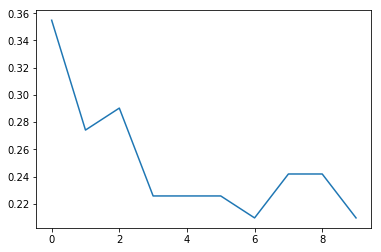

In [518]:
plt.plot(range(len(f1s)),f1s)